In [1]:
%matplotlib inline
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
files = {
    "Control_EEG_sub_037": "data/Control_EEG_sub_037.npy",
    "Control_EEG_sub_037_processed": "data/Control_EEG_sub_037_processed.npy",
    "AD_EEG_sub_001": "data/AD_EEG_sub_001.npy",
    "AD_EEG_sub_001_processed": "data/AD_EEG_sub_001_processed.npy",
}

# Load data
eeg_data = {name: np.load(path, allow_pickle=True) for name, path in files.items()}

# Check the structure of each dataset
eeg_summary = {name: {"shape": data.shape, "dtype": data.dtype} for name, data in eeg_data.items()}
eeg_summary

{'Control_EEG_sub_037': {'shape': (3, 150000), 'dtype': dtype('float64')},
 'Control_EEG_sub_037_processed': {'shape': (3, 150000),
  'dtype': dtype('float64')},
 'AD_EEG_sub_001': {'shape': (3, 150000), 'dtype': dtype('float64')},
 'AD_EEG_sub_001_processed': {'shape': (3, 150000), 'dtype': dtype('float64')}}

### Raw Signal Plots ###
- the plot above shows EEG signals from three channels for both a control subject and an Alzheimer's Disease (AD) subject over the first 5000 time points.

#### Observations:
- The EEG signals appear to have similar overall structures but may exhibit differences in amplitude, frequency, or patterns.
- The AD subject's EEG may have more irregularities or lower amplitude variations compared to the control subject.

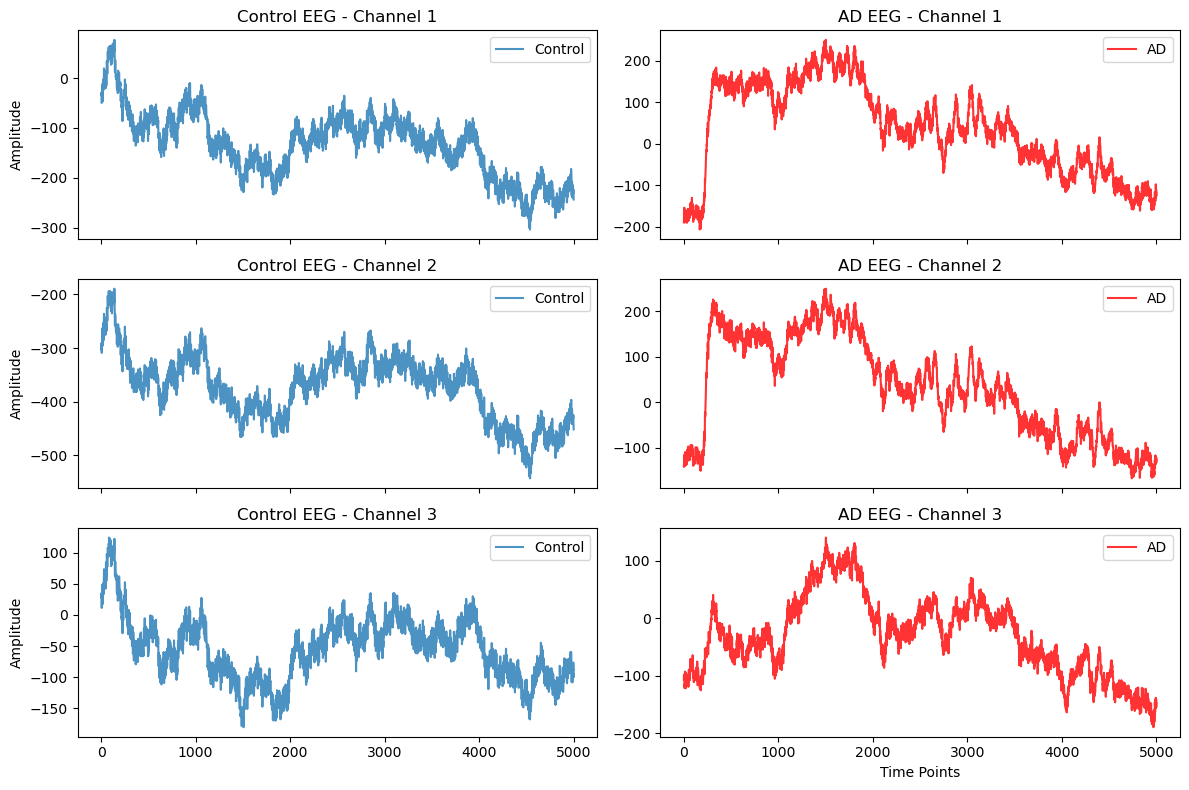

In [3]:
# Selected a subset of data for visualization (first 5000 time points)
time_points = 5000

# Plot raw EEG signals for Control and AD subjects
fig, axes = plt.subplots(3, 2, figsize=(12, 8), sharex=True)

for i in range(3):
    axes[i, 0].plot(eeg_data["Control_EEG_sub_037"][i, :time_points], label="Control", alpha=0.8)
    axes[i, 0].set_title(f"Control EEG - Channel {i+1}")
    axes[i, 0].set_ylabel("Amplitude")
    axes[i, 0].legend()

    axes[i, 1].plot(eeg_data["AD_EEG_sub_001"][i, :time_points], label="AD", color='r', alpha=0.8)
    axes[i, 1].set_title(f"AD EEG - Channel {i+1}")
    axes[i, 1].legend()

plt.xlabel("Time Points")
plt.tight_layout()
plt.show()

### Processed Signal Plots 
The plots below show the processed EEG signals for all three channels, comparing Control (blue) vs. AD

Observations:
- Smoother and Less Noisy Signals:
    - The processed EEG signals appear cleaner and more refined compared to the raw data, likely due to filtering or artifact removal.
- Reduced Amplitude Differences:
    - The amplitude range in the processed data is more normalized, meaning preprocessing likely involved baseline correction or standardization.
    - This makes direct comparisons of signal structure easier.
- Control vs. AD Differences Still Present:
    - Despite preprocessing, AD EEG still appears more irregular, possibly reflecting the underlying neural disruptions in Alzheimer's disease.

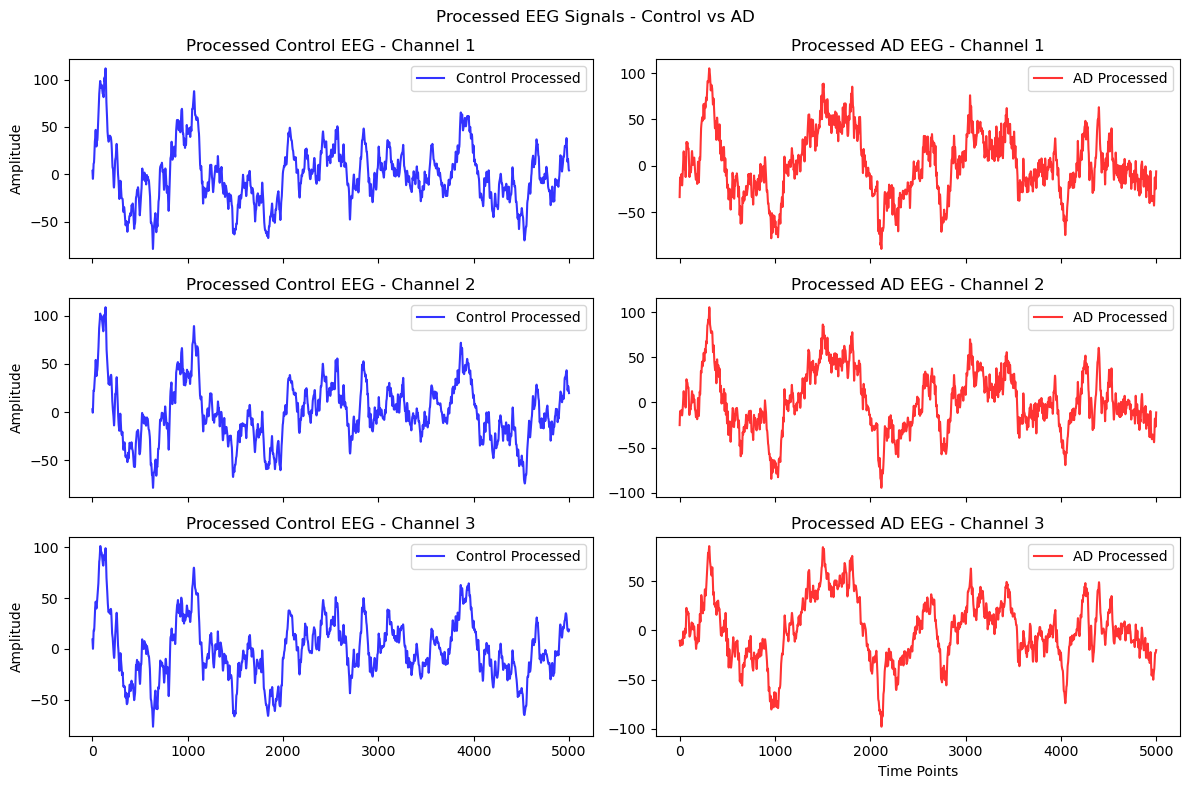

In [4]:
# Selected a subset of data for visualization (first 5000 time points)
time_points = 5000

# Plot processed EEG signals for Control and AD subjects
fig, axes = plt.subplots(3, 2, figsize=(12, 8), sharex=True)

for i in range(3):
    axes[i, 0].plot(eeg_data["Control_EEG_sub_037_processed"][i, :time_points], label="Control Processed", alpha=0.8, color="blue")
    axes[i, 0].set_title(f"Processed Control EEG - Channel {i+1}")
    axes[i, 0].set_ylabel("Amplitude")
    axes[i, 0].legend()

    axes[i, 1].plot(eeg_data["AD_EEG_sub_001_processed"][i, :time_points], label="AD Processed", alpha=0.8, color="red")
    axes[i, 1].set_title(f"Processed AD EEG - Channel {i+1}")
    axes[i, 1].legend()

plt.xlabel("Time Points")
plt.suptitle("Processed EEG Signals - Control vs AD")
plt.tight_layout()
plt.show()

### Rolling Mean & Smoothing Analysis:
The first plot shows the smoothed EEG signals for all three channels of both Control and AD subjects using a rolling mean with a window size of 100.
The smoothing helps reveal general trends while reducing noise, making it easier to compare the two conditions.

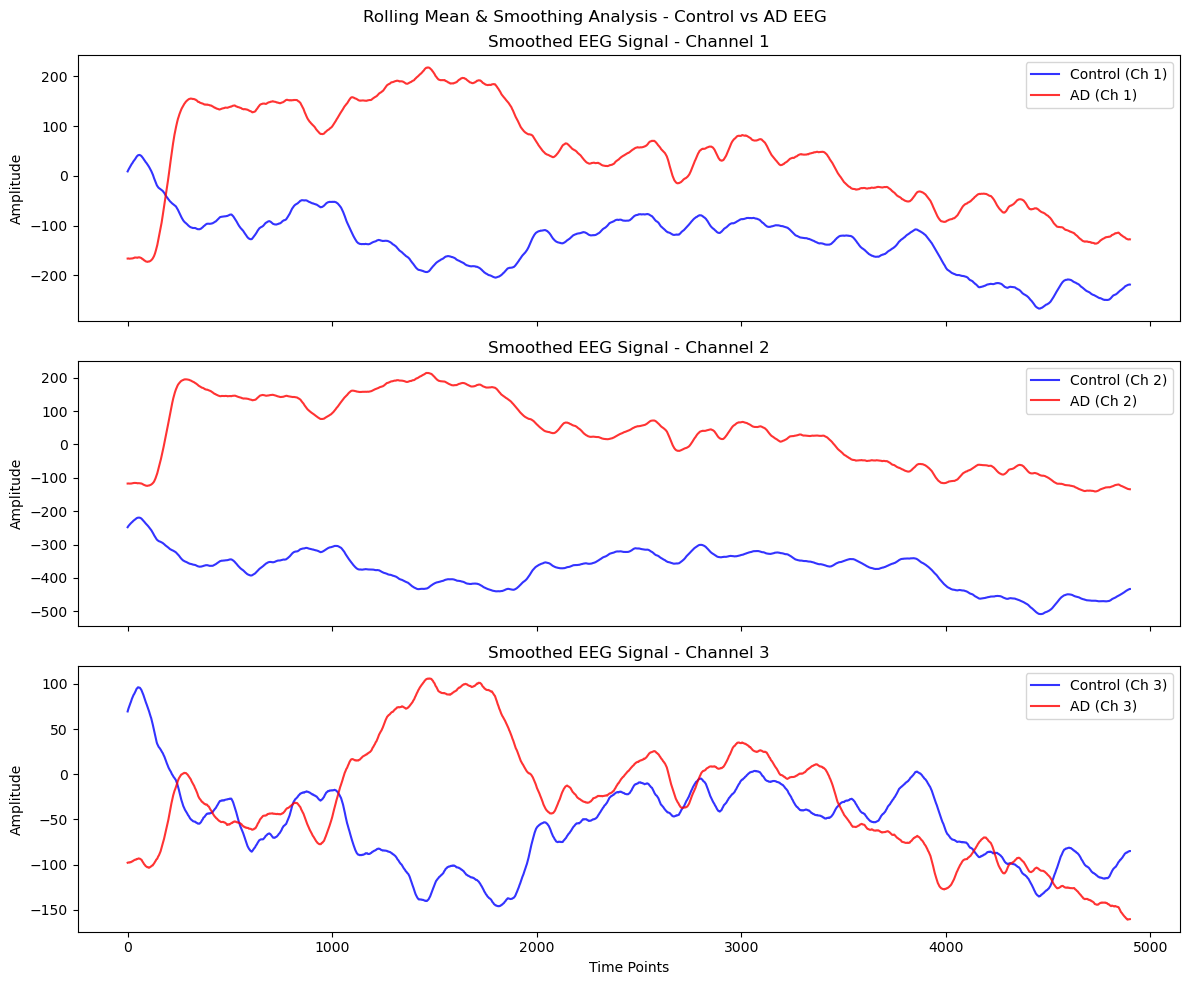

In [5]:
# Perform Rolling Mean & Smoothing for all three channels
window_size = 100  # Define smoothing window (100 time points)
time_points = 5000  # Limit for visualization

fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

for i in range(3):
    smoothed_control = np.convolve(eeg_data["Control_EEG_sub_037"][i, :time_points], np.ones(window_size)/window_size, mode='valid')
    smoothed_ad = np.convolve(eeg_data["AD_EEG_sub_001"][i, :time_points], np.ones(window_size)/window_size, mode='valid')

    axes[i].plot(smoothed_control, label=f"Control (Ch {i+1})", alpha=0.8, color="blue")
    axes[i].plot(smoothed_ad, label=f"AD (Ch {i+1})", alpha=0.8, color="red")
    axes[i].set_title(f"Smoothed EEG Signal - Channel {i+1}")
    axes[i].set_ylabel("Amplitude")
    axes[i].legend()

plt.xlabel("Time Points")
plt.suptitle("Rolling Mean & Smoothing Analysis - Control vs AD EEG")
plt.tight_layout()
plt.show()

### Observations:
- Control EEG (Blue) vs. AD EEG (Red):
    - Across all three channels, the Control signals tend to have more structured, consistent patterns.
    - The AD signals appear more irregular and less synchronized across time, which could indicate disruptions in neural activity.
- Differences in Amplitude and Trends:
    - Channel 1 and Channel 2 show a more noticeable difference in amplitude between Control and AD.
    - Channel 3 appears to have less variation but still shows some divergence between the two conditions.

This suggests that neural connectivity and brain activity may be more disrupted in AD, which aligns with findings in neurodegenerative disease research.

### Comparison Between Conditions:
The histogram compares the distribution of unprocessed EEG amplitudes for Control vs. AD subjects on all 3 channels.
The AD EEG distribution appears slightly different from the Control EEG, potentially indicating differences in signal amplitude variability.

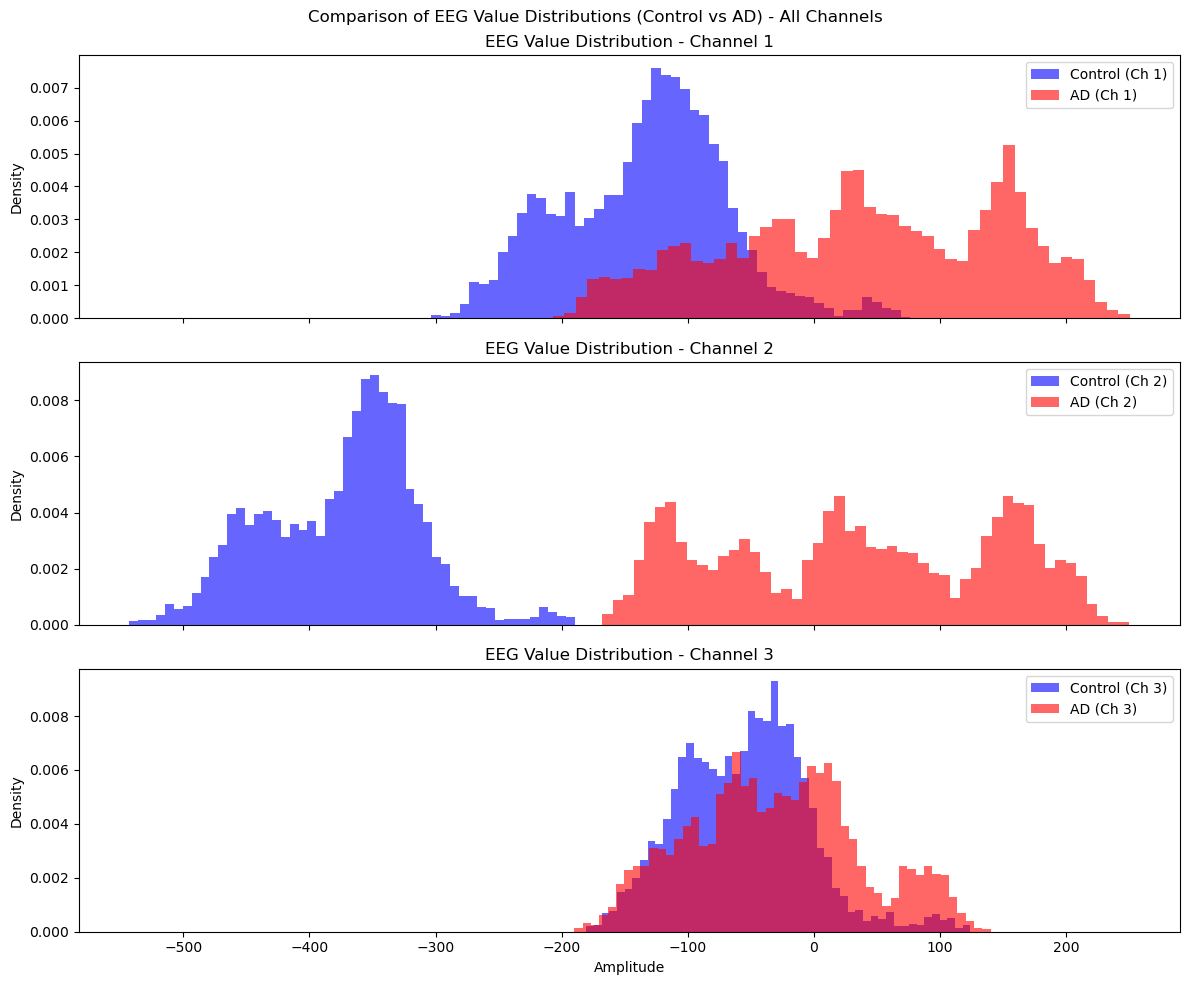

In [6]:
# Perform Comparison Between Conditions: Histogram of EEG Values for all three channels
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

for i in range(3):
    axes[i].hist(eeg_data["Control_EEG_sub_037"][i, :5000], bins=50, alpha=0.6, label=f"Control (Ch {i+1})", color='blue', density=True)
    axes[i].hist(eeg_data["AD_EEG_sub_001"][i, :5000], bins=50, alpha=0.6, label=f"AD (Ch {i+1})", color='red', density=True)
    axes[i].set_title(f"EEG Value Distribution - Channel {i+1}")
    axes[i].set_ylabel("Density")
    axes[i].legend()

plt.xlabel("Amplitude")
plt.suptitle("Comparison of EEG Value Distributions (Control vs AD) - All Channels")
plt.tight_layout()
plt.show()

### Observations:
1. Shape of Distribution:
    - In all three channels, the Control EEG signals have a slightly more compact, Gaussian-like distribution.
    - The AD EEG signals appear more spread out and may have heavier tails, suggesting more variability in brain activity.
2. Amplitude Differences:
    - The AD distributions tend to have a wider spread, meaning more extreme values occur in AD patients.
    - This could indicate higher noise levels or neural instability in AD.
3. Channel-Specific Trends:
    - Channels 1 and 2 show more notable separation between Control and AD.
    - Channel 3 has less difference, meaning it may be less affected by AD or record different neural activity.

What This Means:
    - The observed differences suggest that EEG signal characteristics are altered in AD, particularly in the amplitude and variability of the signals.
    - These patterns may serve as biomarkers for distinguishing Control vs. AD EEG activity.

### Cross-Correlation Between Channels
The cross-correlation plots show how synchronized different EEG channels are over different time lags.
- Control EEG: Channels show stronger synchronization, with visible peaks at certain lags.
- AD EEG: The cross-correlation appears weaker and less structured, possibly indicating reduced neural connectivity.

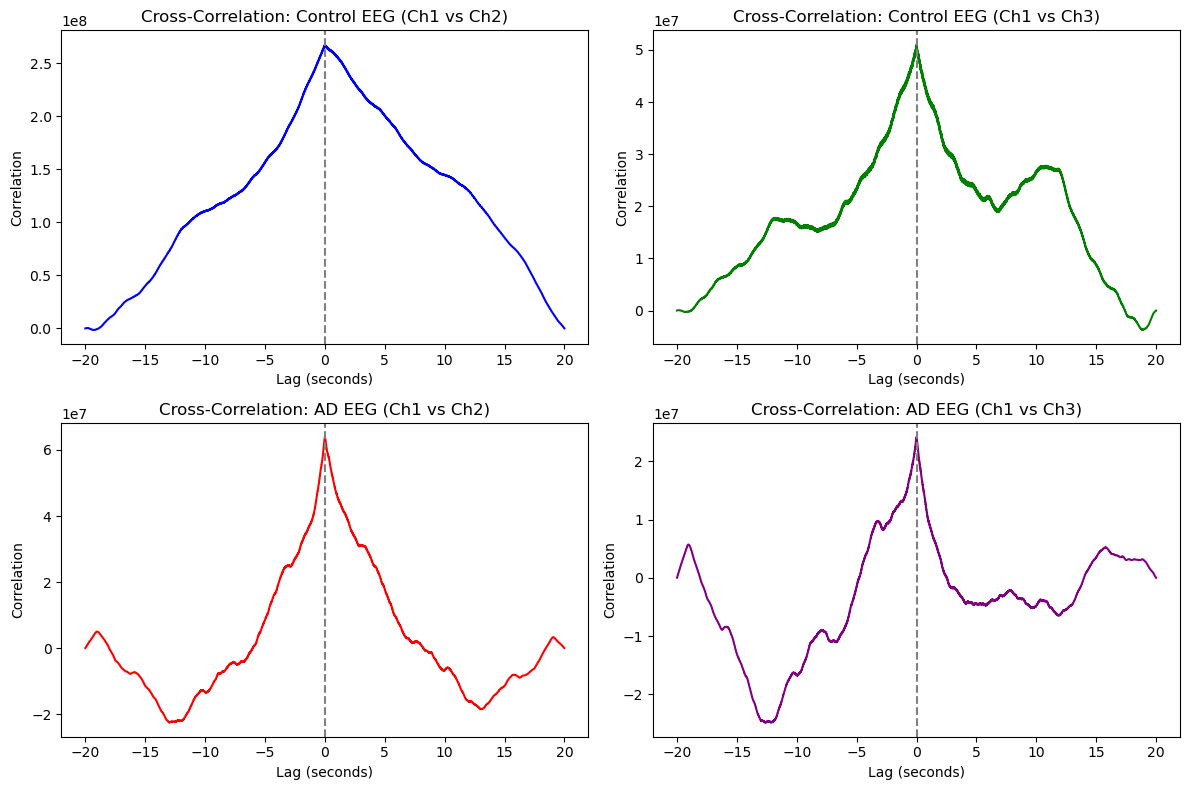

In [7]:
control_path = "data/Control_EEG_sub_037.npy"
ad_path = "data/AD_EEG_sub_001.npy"

# Load the data
control_eeg = np.load(control_path, allow_pickle=True)
ad_eeg = np.load(ad_path, allow_pickle=True)

# Parameters
n_points = 5000
sampling_rate = 250  # Hz
lags = np.arange(-n_points + 1, n_points) / sampling_rate  # Convert lag indices to seconds

# Cross-correlations between channels
channel_1_2_control = np.correlate(control_eeg[0, :n_points], control_eeg[1, :n_points], mode='full')
channel_1_3_control = np.correlate(control_eeg[0, :n_points], control_eeg[2, :n_points], mode='full')

channel_1_2_ad = np.correlate(ad_eeg[0, :n_points], ad_eeg[1, :n_points], mode='full')
channel_1_3_ad = np.correlate(ad_eeg[0, :n_points], ad_eeg[2, :n_points], mode='full')

# Plot cross-correlations with lag in seconds
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(lags, channel_1_2_control, color='blue')
axes[0, 0].set_title("Cross-Correlation: Control EEG (Ch1 vs Ch2)")
axes[0, 0].set_xlabel("Lag (seconds)")
axes[0, 0].set_ylabel("Correlation")
axes[0, 0].axvline(0, color='gray', linestyle='--')

axes[0, 1].plot(lags, channel_1_3_control, color='green')
axes[0, 1].set_title("Cross-Correlation: Control EEG (Ch1 vs Ch3)")
axes[0, 1].set_xlabel("Lag (seconds)")
axes[0, 1].set_ylabel("Correlation")
axes[0, 1].axvline(0, color='gray', linestyle='--')

axes[1, 0].plot(lags, channel_1_2_ad, color='red')
axes[1, 0].set_title("Cross-Correlation: AD EEG (Ch1 vs Ch2)")
axes[1, 0].set_xlabel("Lag (seconds)")
axes[1, 0].set_ylabel("Correlation")
axes[1, 0].axvline(0, color='gray', linestyle='--')

axes[1, 1].plot(lags, channel_1_3_ad, color='purple')
axes[1, 1].set_title("Cross-Correlation: AD EEG (Ch1 vs Ch3)")
axes[1, 1].set_xlabel("Lag (seconds)")
axes[1, 1].set_ylabel("Correlation")
axes[1, 1].axvline(0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

### Why is Cross-Correlation Useful for EEG Data?
Cross-correlation is particularly valuable for EEG analysis because it helps us understand the temporal relationships and synchronization between different brain regions. Here’s why it’s useful for this data:
1. Detecting Functional Connectivity
    - EEG channels record electrical activity from different brain regions. Cross-correlation helps measure how well two channels are synchronized over time.
    - In healthy brains, different regions communicate efficiently, leading to high correlation.
    - In Alzheimer’s Disease (AD), brain network disruptions often cause weaker or more chaotic correlations.
2. Identifying Time Delays in Brain Signals
    - Peaks in the cross-correlation function indicate how much one channel leads or lags behind another.
    - This can reveal how signals propagate between different brain regions.
    - For instance, a shifted peak suggests a delayed response, which can be due to cognitive decline, slower neural transmission, or disrupted pathways in AD patients.
3. Comparing Control vs. AD Neural Patterns
    - Stronger cross-correlation in Control EEG → Indicates robust neural connectivity.
    - Weaker cross-correlation in AD EEG → Suggests weakened neural synchronization, which aligns with research on neurodegenerative diseases.
    - This difference may serve as a potential biomarker for detecting AD using EEG signals.

### Observations from the Cross-Correlation Graphs:
1. Control EEG
    - The cross-correlation plots for Ch1 vs. Ch2 and Ch1 vs. Ch3 in Control EEG show strong peaks at certain lags.
    - This suggests that different EEG channels are highly synchronized, meaning brain regions corresponding to these channels are functionally connected.
    - The presence of peaks at nonzero lags could indicate a consistent time delay in activity transmission between channels.
2. AD EEG
    - The cross-correlation in AD EEG appears weaker and less structured compared to Control EEG.
    - There are lower peaks and a more spread-out pattern, indicating reduced synchronization between channels.
    - This could mean that neural connectivity is impaired in AD patients, a known characteristic of Alzheimer’s disease.
    - The flatter or less distinct peaks suggest that the information transfer between brain regions is less predictable and more disrupted.

what this means: 
- In healthy (Control) subjects, EEG channels show stronger correlations and structured patterns, suggesting functional connectivity between different brain regions.
- In AD subjects, EEG synchronization is reduced or disrupted, supporting the hypothesis that Alzheimer’s disease weakens neural connectivity.

## Spectrogram

In [8]:
#paper at https://www.mdpi.com/2306-5729/8/6/95
#heng's github at https://github.com/hengxu19/COGS118C/blob/master/Final_Project_Data/data_curation.ipynb

### Heng's Code:

In [9]:
processed_AD = np.load("data/AD_EEG_sub_001_processed.npy")
AD = np.load("data/AD_EEG_sub_001.npy")
processed_Control = np.load("data/Control_EEG_sub_037_processed.npy")
Control = np.load("data/Control_EEG_sub_037.npy")

In [10]:
np.set_printoptions(threshold=np.inf)
print()

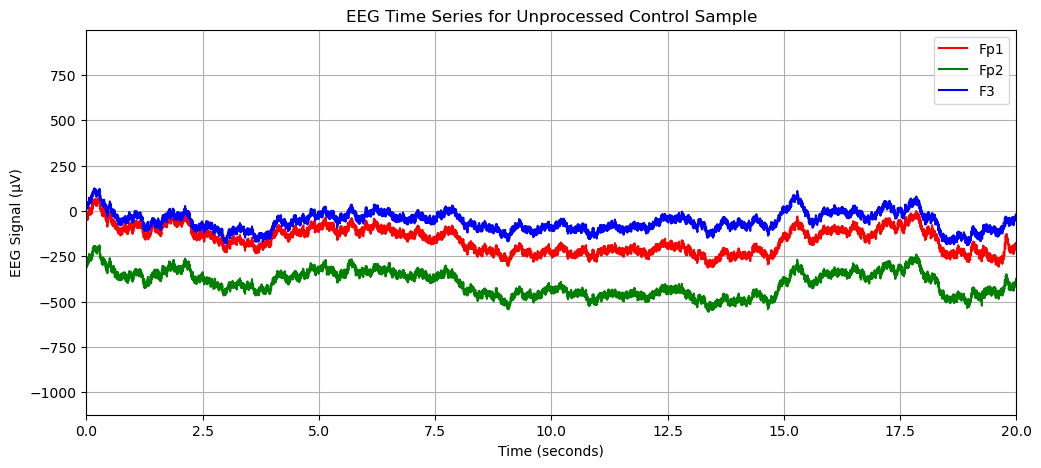

In [11]:
fs = 500  # Sampling rate (Hz)
num_samples = Control.shape[1]  # 10000 samples

time = np.linspace(0, num_samples / fs, num_samples)

channels = ['Fp1', 'Fp2', 'F3']
colors = ['r', 'g', 'b']  # Red, Green, Blue

plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time, Control[i, :], label=channels[i], color=colors[i])

# Formatting
plt.xlim(0,20)
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Signal (µV)")
plt.title("EEG Time Series for Unprocessed Control Sample")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

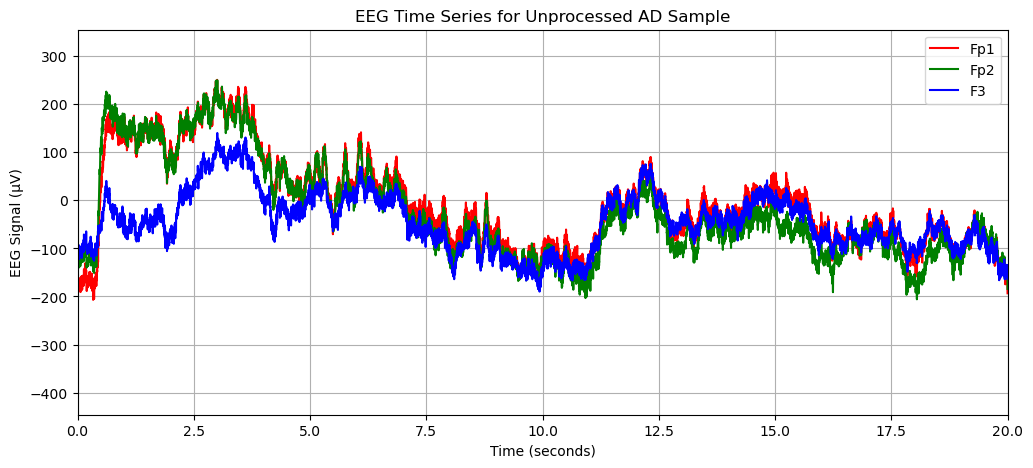

In [12]:
fs = 500  # Sampling rate (Hz)
num_samples = AD.shape[1]  # 10000 samples

time = np.linspace(0, num_samples / fs, num_samples)

channels = ['Fp1', 'Fp2', 'F3']
colors = ['r', 'g', 'b']  # Red, Green, Blue

plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time, AD[i, :], label=channels[i], color=colors[i])

# Formatting
plt.xlim(0,20)
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Signal (µV)")
plt.title("EEG Time Series for Unprocessed AD Sample")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

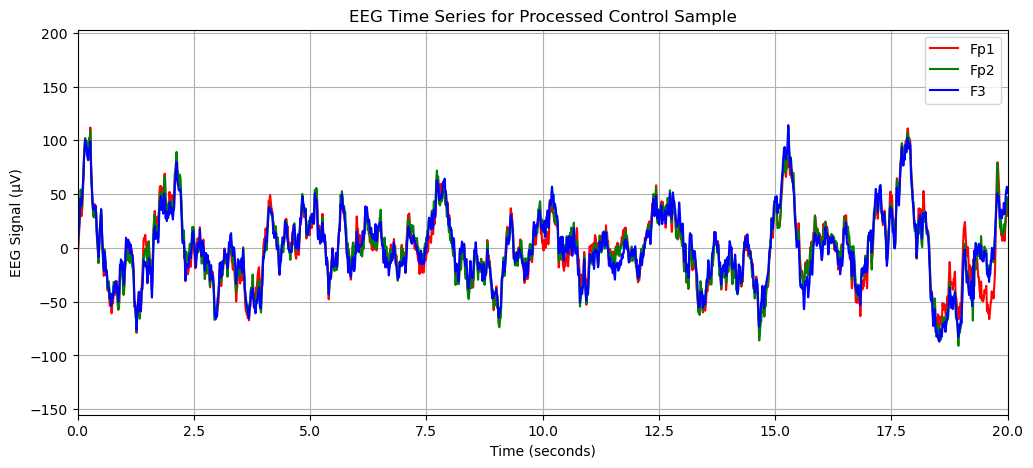

In [13]:
fs = 500  # Sampling rate (Hz)
num_samples = processed_Control.shape[1]  # 10000 samples

time = np.linspace(0, num_samples / fs, num_samples)

channels = ['Fp1', 'Fp2', 'F3']
colors = ['r', 'g', 'b']  # Red, Green, Blue

plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time, processed_Control[i, :], label=channels[i], color=colors[i])

# Formatting
plt.xlim(0,20)
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Signal (µV)")
plt.title("EEG Time Series for Processed Control Sample")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

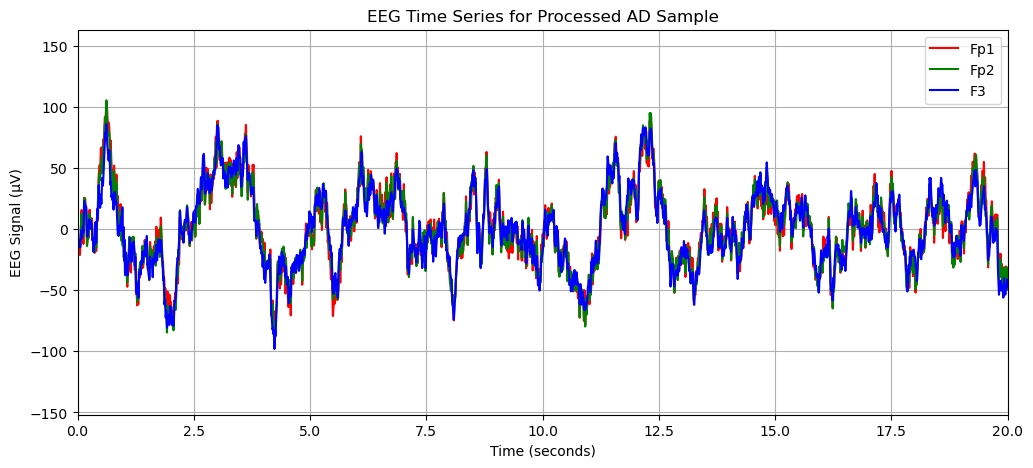

In [14]:

fs = 500  # Sampling rate (Hz)
num_samples = processed_AD.shape[1]  # 10000 samples

time = np.linspace(0, num_samples / fs, num_samples)

channels = ['Fp1', 'Fp2', 'F3']
colors = ['r', 'g', 'b']  # Red, Green, Blue

plt.figure(figsize=(12, 5))
for i in range(3):
    plt.plot(time, processed_AD[i, :], label=channels[i], color=colors[i])

# Formatting
plt.xlim(0,20)
plt.xlabel("Time (seconds)")
plt.ylabel("EEG Signal (µV)")
plt.title("EEG Time Series for Processed AD Sample")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

### Original Code Apart From Here

In [15]:
freq_bands = {
    "Delta": (0.5, 4),
    "Theta": (4, 8),
    "Alpha": (8, 12),
    "Beta": (12, 30),
}

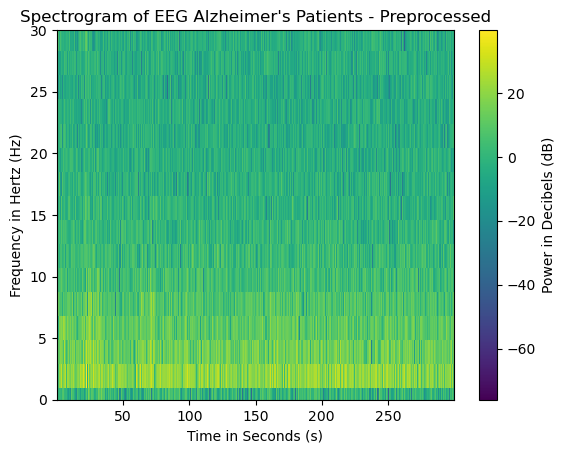

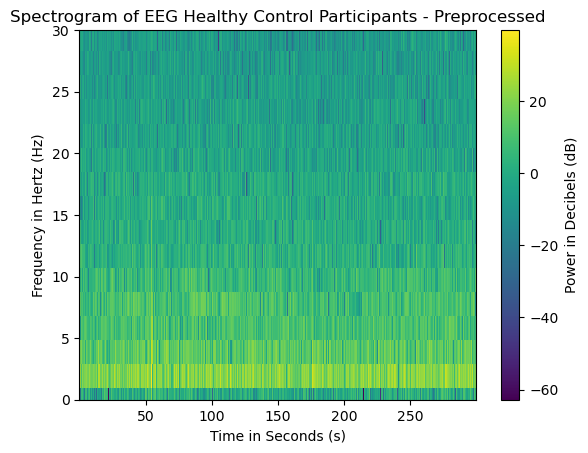

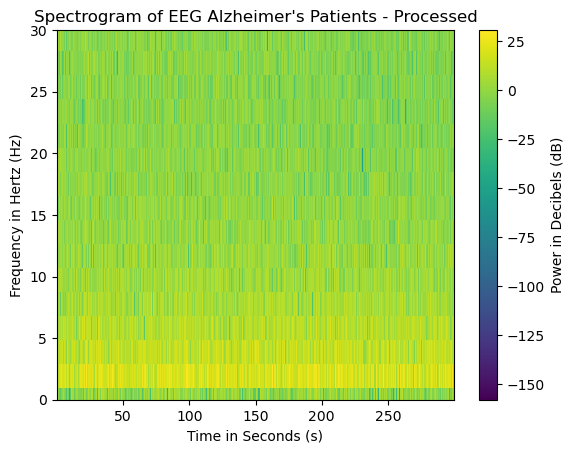

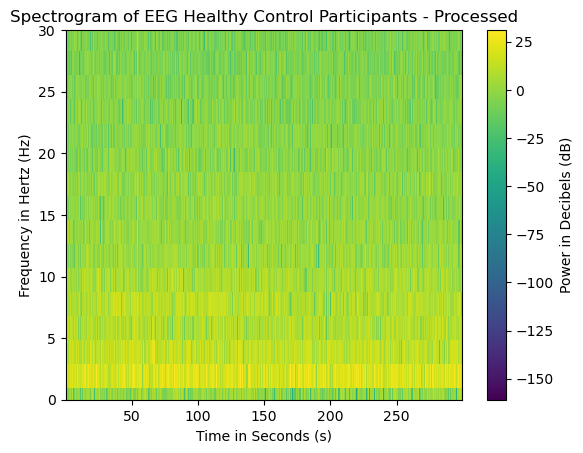

In [16]:
from scipy.signal import spectrogram

f, t, S = spectrogram(AD[0,:], fs=fs, nperseg=256)
plt.pcolor(t, f, 10 * np.log10(S))
plt.ylim(0,30)
plt.ylabel("Frequency in Hertz (Hz)")
plt.xlabel("Time in Seconds (s)")
plt.title("Spectrogram of EEG Alzheimer's Patients - Preprocessed")
plt.colorbar(label="Power in Decibels (dB)")
plt.show()

f, t, S = spectrogram(Control[0,:], fs=fs, nperseg=256)
plt.pcolor(t, f, 10 * np.log10(S))
plt.ylim(0,30)
plt.ylabel("Frequency in Hertz (Hz)")
plt.xlabel("Time in Seconds (s)")
plt.title("Spectrogram of EEG Healthy Control Participants - Preprocessed")
plt.colorbar(label="Power in Decibels (dB)")
plt.show()

f, t, S = spectrogram(processed_AD[0,:], fs=fs, nperseg=256)
plt.pcolor(t, f, 10 * np.log10(S))
plt.ylim(0,30)
plt.ylabel("Frequency in Hertz (Hz)")
plt.xlabel("Time in Seconds (s)")
plt.title("Spectrogram of EEG Alzheimer's Patients - Processed")
plt.colorbar(label="Power in Decibels (dB)")
plt.show()

f, t, S = spectrogram(processed_Control[0,:], fs=fs, nperseg=256)
plt.pcolor(t, f, 10 * np.log10(S))
plt.ylim(0,30)
plt.ylabel("Frequency in Hertz (Hz)")
plt.xlabel("Time in Seconds (s)")
plt.title("Spectrogram of EEG Healthy Control Participants - Processed")
plt.colorbar(label="Power in Decibels (dB)")
plt.show()


## Signal Processing

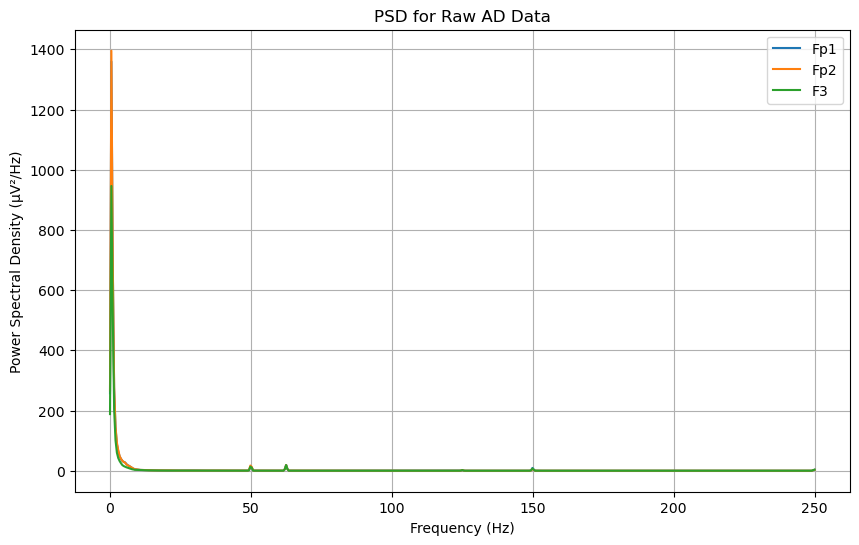

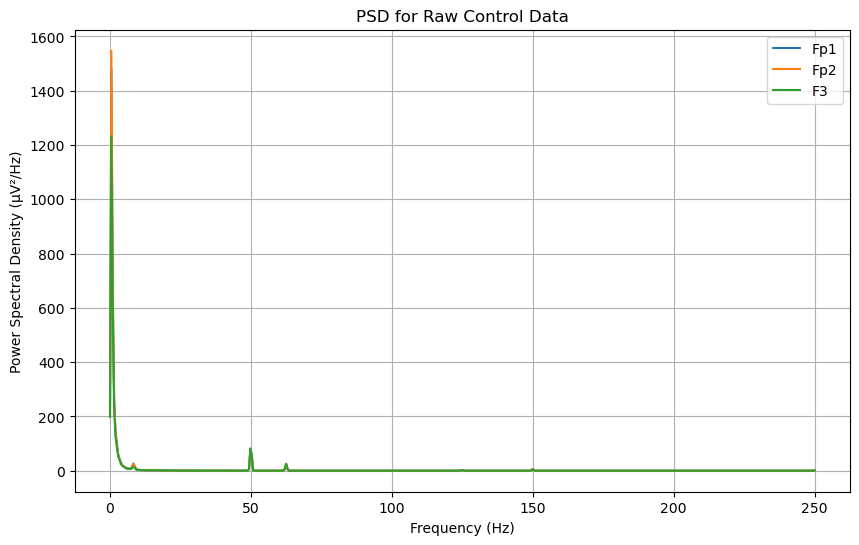

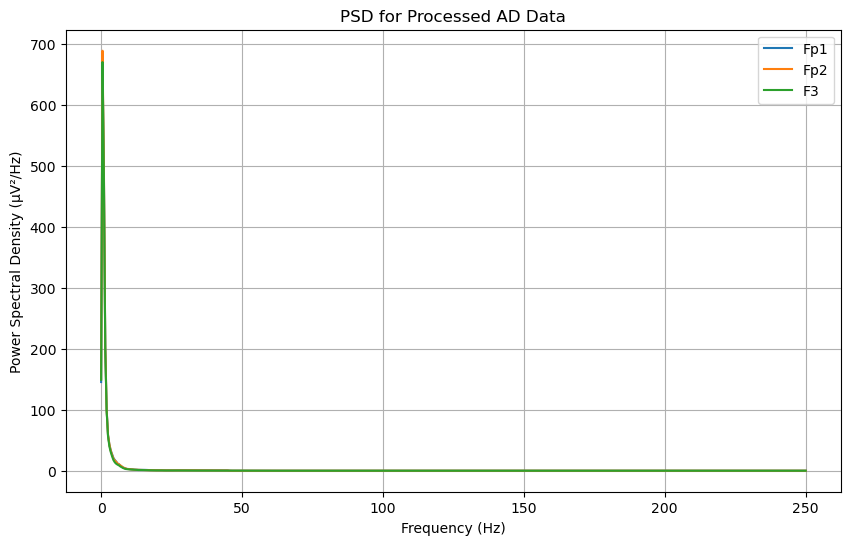

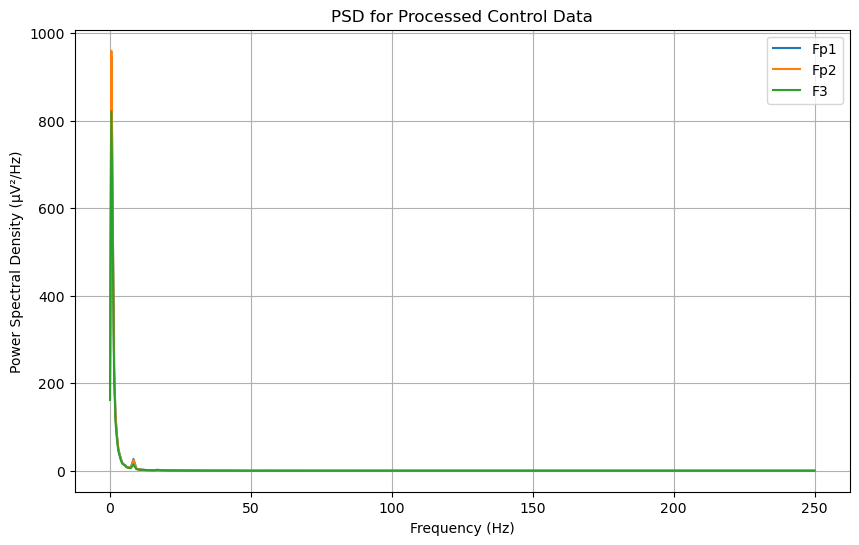

Delta Band Power:
AD Raw: [238.97516534 246.95479657 166.71979567]
Control Raw: [233.1336799  229.98540063 207.53064621]
AD Processed: [167.4951844  167.06638719 160.59528237]
Control Processed: [204.74802617 203.25111764 182.28359909]

Theta Band Power:
AD Raw: [71.22590697 70.23198655 36.65126047]
Control Raw: [37.69873817 36.1905262  33.03307206]
AD Processed: [40.34908786 39.42352637 32.45894156]
Control Processed: [35.81897561 34.66996488 31.46510762]

Alpha Band Power:
AD Raw: [13.8887672  14.8670835  10.21706239]
Control Raw: [25.0664751  24.91997287 17.47032359]
AD Processed: [10.97878474 10.77399076  9.13207668]
Control Processed: [25.12748896 23.83724096 16.63671571]

Beta Band Power:
AD Raw: [14.45464498 15.36040869 10.35360432]
Control Raw: [15.30033064 15.3278964  14.37363542]
AD Processed: [15.57759209 12.62943524  9.36673018]
Control Processed: [14.3451876  13.51938473 12.33537296]



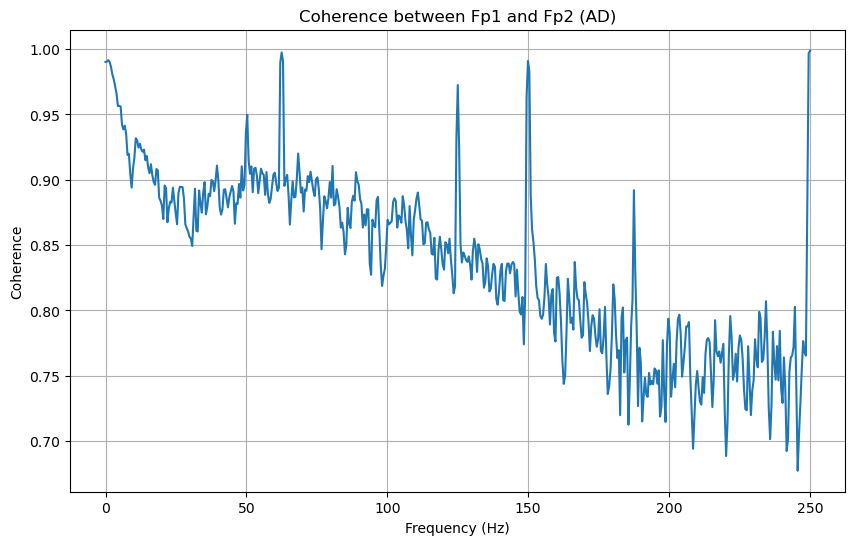

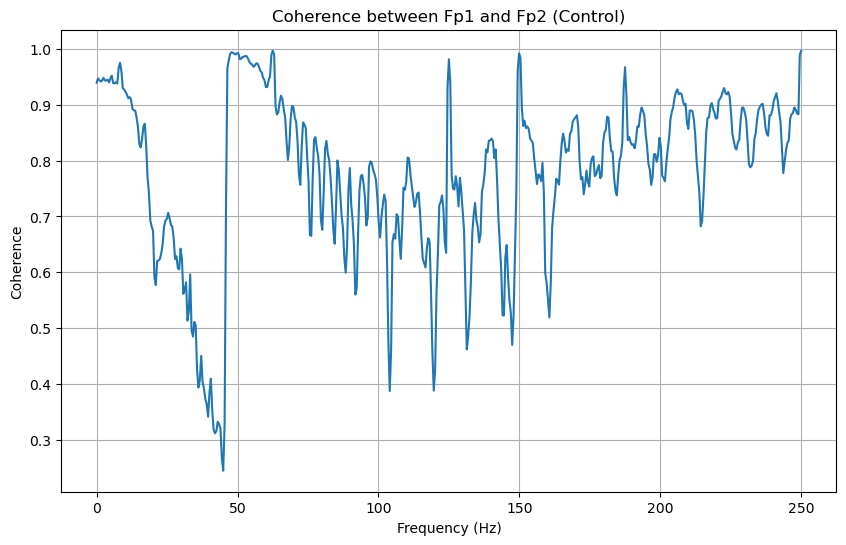

In [17]:
from scipy.signal import welch, coherence
from scipy.integrate import simps

AD_raw = np.load("data/AD_EEG_sub_001.npy")
AD_processed = np.load("data/AD_EEG_sub_001_processed.npy")
Control_raw = np.load("data/Control_EEG_sub_037.npy")
Control_processed = np.load("data/Control_EEG_sub_037_processed.npy")

fs = 500
channels = ['Fp1', 'Fp2', 'F3']
num_samples = AD_raw.shape[1]
time = np.linspace(0, num_samples / fs, num_samples)

freq_bands = {'delta': (1, 4), 'theta': (4, 8), 'alpha': (8, 13), 'beta': (13, 30)}

def compute_psd_and_band_power(data, fs, freq_bands):
    freqs, psd = welch(data, fs, nperseg=1024)
    band_power = {}
    for band, (fmin, fmax) in freq_bands.items():
        band_idx = np.logical_and(freqs >= fmin, freqs <= fmax)
        band_power[band] = simps(psd[:, band_idx], freqs[band_idx], axis=1)
    return freqs, psd, band_power

def plot_psd(freqs, psd, title):
    plt.figure(figsize=(10, 6))
    for i, channel in enumerate(channels):
        plt.plot(freqs, psd[i], label=channel)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (µV²/Hz)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_coherence(data1, data2, fs, title):
    freqs, coh = coherence(data1, data2, fs, nperseg=1024)
    plt.figure(figsize=(10, 6))
    plt.plot(freqs, coh)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Coherence')
    plt.title(title)
    plt.grid(True)
    plt.show()

freqs_AD_raw, psd_AD_raw, band_power_AD_raw = compute_psd_and_band_power(AD_raw, fs, freq_bands)
freqs_Control_raw, psd_Control_raw, band_power_Control_raw = compute_psd_and_band_power(Control_raw, fs, freq_bands)

plot_psd(freqs_AD_raw, psd_AD_raw, "PSD for Raw AD Data")
plot_psd(freqs_Control_raw, psd_Control_raw, "PSD for Raw Control Data")

freqs_AD_processed, psd_AD_processed, band_power_AD_processed = compute_psd_and_band_power(AD_processed, fs, freq_bands)
freqs_Control_processed, psd_Control_processed, band_power_Control_processed = compute_psd_and_band_power(Control_processed, fs, freq_bands)

plot_psd(freqs_AD_processed, psd_AD_processed, "PSD for Processed AD Data")
plot_psd(freqs_Control_processed, psd_Control_processed, "PSD for Processed Control Data")

bands = list(freq_bands.keys())
for band in bands:
    print(f"{band.capitalize()} Band Power:")
    print(f"AD Raw: {band_power_AD_raw[band]}")
    print(f"Control Raw: {band_power_Control_raw[band]}")
    print(f"AD Processed: {band_power_AD_processed[band]}")
    print(f"Control Processed: {band_power_Control_processed[band]}")
    print()

plot_coherence(AD_processed[0], AD_processed[1], fs, "Coherence between Fp1 and Fp2 (AD)")
plot_coherence(Control_processed[0], Control_processed[1], fs, "Coherence between Fp1 and Fp2 (Control)")